In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Uploading and reading the dataset 

In [177]:
df=pd.read_csv("car_web_scraped_dataset.csv")

df.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"


# Data Understanding

In [178]:
# Checking the number of rows and columns

df.shape

(2840, 6)

In [179]:
# Checking descriptive analaysis of dataset

df.describe()

,year
count,2840.000000
mean,2018.833803
std,3.557585
min,2000.000000
25%,2017.000000
50%,2020.000000
75%,2021.000000
max,2024.000000


In [180]:
# Checking the data types of each column

print(df.dtypes)

name         object
year          int64
miles        object
color        object
condition    object
price        object
dtype: object


In [181]:
# Checking for missing values

df.isnull().sum()

name         0
year         0
miles        0
color        0
condition    0
price        0
dtype: int64

In [182]:
# Checking for duplicates

duplicate_rows= df.duplicated().sum()
print(duplicate_rows)

528


In [183]:
# Checking the uniquess of the 'name' column

df["name"].unique()

array(['Kia Forte', 'Chevrolet Silverado 1500', 'Toyota RAV4',
       'Honda Civic', 'Honda Accord', 'Mercedes-Benz GLC', 'BMW 5 Series',
       'Jeep Wrangler', 'Porsche Macan', 'Buick Cascada', 'BMW 3 Series',
       'Jeep Grand Cherokee', 'Mercedes-Benz C-Class', 'Porsche Cayenne',
       'Honda Odyssey', 'BMW 7 Series', 'Kia K5', 'Nissan Kicks',
       'Honda CR-V', 'Chrysler Pacifica', 'Volkswagen Tiguan',
       'Nissan Sentra', 'Toyota Camry', 'Chevrolet Malibu',
       'Chevrolet Volt', 'Land Rover Range Rover Sport',
       'Toyota Highlander', 'Kia Optima', 'Dodge Charger',
       'Toyota Corolla', 'Toyota Tacoma', 'Toyota 4Runner',
       'Ford Mustang', 'Ford F-150', 'Honda Pilot', 'Nissan Rogue Sport',
       'INFINITI QX60', 'Volvo XC60', 'Ford Explorer',
       'Chevrolet Equinox', 'Mercedes-Benz GLE', 'Mercedes-Benz S-Class',
       'Volvo S90', 'BMW X3', 'Mercedes-Benz GLS', 'Ford Bronco Sport',
       'Mitsubishi Outlander Sport', 'Volvo XC90', 'Lexus RX',
       'Mer

# Data Cleaning

In [184]:
# Dropping the duplicate rows

df=df.drop_duplicates()

In [185]:
df.shape

(2312, 6)

In [186]:
# Capitalize column names

df.rename(columns={col: col.capitalize() for col in df.columns}, inplace=True)

In [187]:
# Check for invalid entries

invalid_entries = df[df.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 Name         0
Year         0
Miles        0
Color        0
Condition    0
Price        0
dtype: int64


In [188]:
# Remove $ sign and commas from 'price' column

df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')

/var/folders/9d/gk0kfr650z11s076ydh2kfd40000gn/T/ipykernel_62808/2964147752.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')


In [189]:
# Remove 'miles' unit and commas from 'miles' column

df['Miles'] = df['Miles'].str.replace('miles', '').str.replace(',', '')

# Encoding

In [190]:
# Splitting the 'condition' into two columns based on comma

df[['Num_of_Accidents', 'Num_of_Owners']] = df['Condition'].str.split(',', expand=True)

# Drop the original 'condition' column
df.drop(columns=['Condition'], inplace=True)

In [191]:
# Splitting the 'color' into two columns based on comma

df[['Exterior_Color', 'Interior_Color']] = df['Color'].str.split(',', expand=True)

# Drop the original 'color' column
df.drop(columns=['Color'], inplace=True)

In [192]:
df.head()

# Now, we can easily the difference after encoding

,Name,Year,Miles,Price,Num_of_Accidents,Num_of_Owners,Exterior_Color,Interior_Color
0,Kia Forte,2022,41406,15988,No accidents reported,1 Owner,Gray exterior,Black interior
1,Chevrolet Silverado 1500,2021,15138,38008,1 accident reported,1 Owner,White exterior,Black interior
2,Toyota RAV4,2022,32879,24988,No accidents reported,1 Owner,Silver exterior,Unknown interior
3,Honda Civic,2020,37190,18998,No accidents reported,1 Owner,Blue exterior,Black interior
4,Honda Civic,2020,27496,19498,No accidents reported,1 Owner,Black exterior,Black interior


# Mapping

In [193]:
df['Num_of_Accidents'].unique()

array(['No accidents reported', '1 accident reported',
       '3 accidents reported', '2 accidents reported',
       '5 accidents reported', '4 accidents reported'], dtype=object)

In [194]:
# Defien a dictionary to map string to numerical values

accident_mapping= {'No accidents reported':0,
                  '1 accident reported':1,
                  '2 accidents reported':2,
                  '3 accidents reported':3,
                  '4 accidents reported':4,
                  '5 accidents reported':5}

df['Num_of_Accidents']=df['Num_of_Accidents'].map(accident_mapping)

In [195]:
df['Num_of_Owners'].unique()

array([' 1 Owner', ' 3 Owners', ' 2 Owners', ' 5 Owners', ' 4 Owners',
       ' 0 Owners', ' 7 Owners', ' 8 Owners'], dtype=object)

In [196]:
# mapping string to numerical values on "Num_of_Owners" col

owners_mapping= {' 0 Owners':0, ' 1 Owner':1,
                ' 2 Owners':2, ' 3 Owners':3,
                ' 4 Owners':4, ' 5 Owners':5,
                ' 7 Owners':7, ' 8 Owners':8}

df['Num_of_Owners']= df['Num_of_Owners'].map(owners_mapping)

# Extraction

In [197]:
print(df["Exterior_Color"].unique())
print(df["Interior_Color"].unique())

['Gray exterior' 'White exterior' 'Silver exterior' 'Blue exterior'
 'Black exterior' 'Red exterior' 'Orange exterior' 'Green exterior'
 'Tan exterior' 'Unknown exterior' 'Gold exterior' 'Yellow exterior'
 'Brown exterior' 'Purple exterior']
[' Black interior' ' Unknown interior' ' Beige interior' ' Brown interior'
 ' Gray interior' ' Orange interior' ' Red interior' ' Green interior'
 ' White interior' ' Blue interior' ' Yellow interior']


In [198]:
# Extracting the first word from 'text_column'

df['Exterior_Color'] = df['Exterior_Color'].str.split().str[0]
df['Interior_Color'] = df['Interior_Color'].str.split().str[0]

In [199]:
df.head()

,Name,Year,Miles,Price,Num_of_Accidents,Num_of_Owners,Exterior_Color,Interior_Color
0,Kia Forte,2022,41406,15988,0,1,Gray,Black
1,Chevrolet Silverado 1500,2021,15138,38008,1,1,White,Black
2,Toyota RAV4,2022,32879,24988,0,1,Silver,Unknown
3,Honda Civic,2020,37190,18998,0,1,Blue,Black
4,Honda Civic,2020,27496,19498,0,1,Black,Black


# Conversion from string to numerical

In [200]:
df['Miles']=df['Miles'].astype(int)
df['Price']=df['Price'].astype(int)

In [201]:
print(df.dtypes)

Name                object
Year                 int64
Miles                int64
Price                int64
Num_of_Accidents     int64
Num_of_Owners        int64
Exterior_Color      object
Interior_Color      object
dtype: object


## Finally, we are able to see the descriptive analysis of most of the columns

In [202]:
df.describe()

,Year,Miles,Price,Num_of_Accidents,Num_of_Owners
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000
mean,2018.873702,49896.590398,25841.419983,0.281142,1.504325
std,3.466794,36287.386865,13880.328572,0.593947,0.852607
min,2000.000000,25.000000,4395.000000,0.000000,0.000000
25%,2017.000000,23590.250000,17991.000000,0.000000,1.000000
50%,2020.000000,40703.000000,22999.000000,0.000000,1.000000
75%,2021.000000,69360.250000,30999.250000,0.000000,2.000000
max,2024.000000,307292.000000,252900.000000,5.000000,8.000000


# Data Visualization

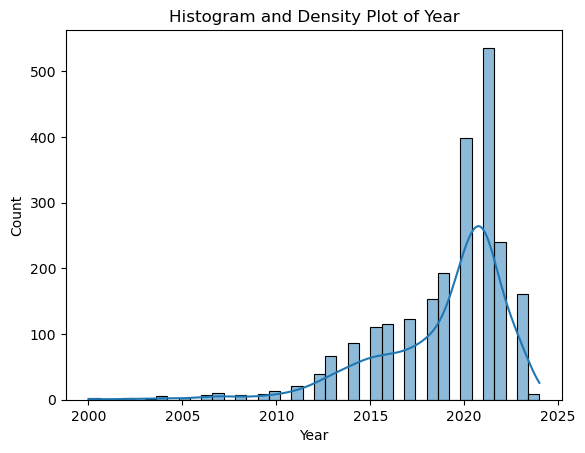

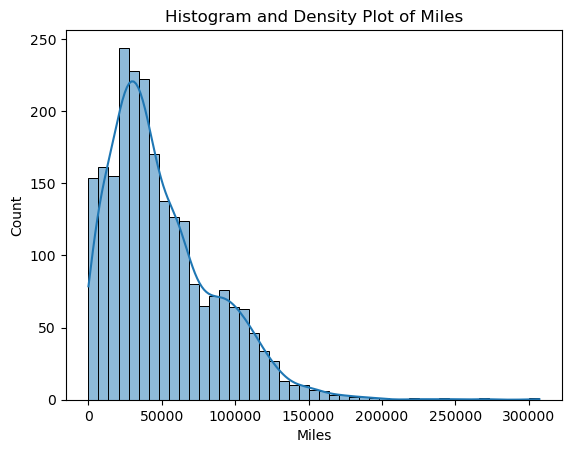

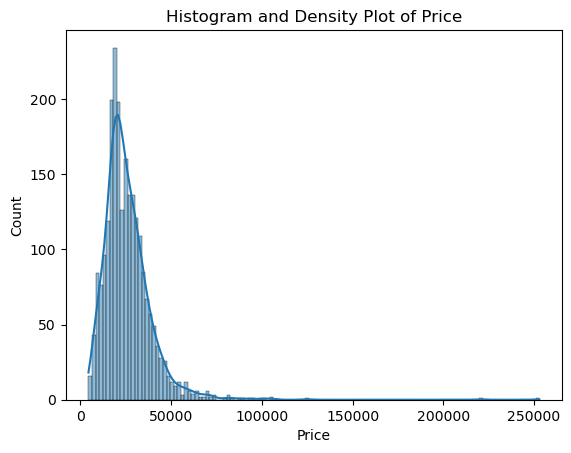

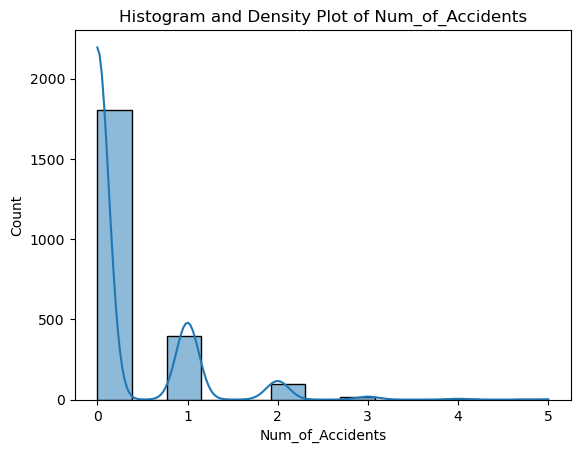

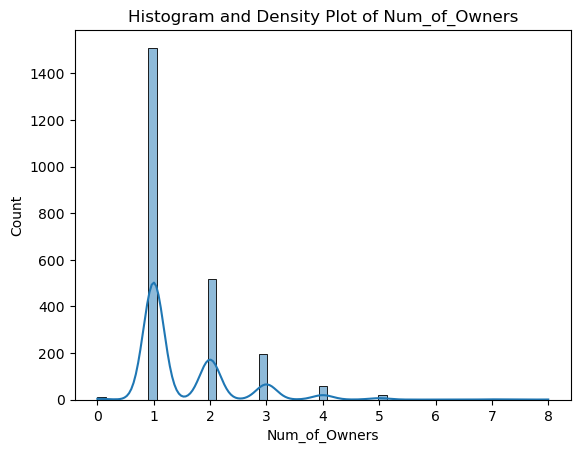

In [203]:
# Histograms and density plots

for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.show()

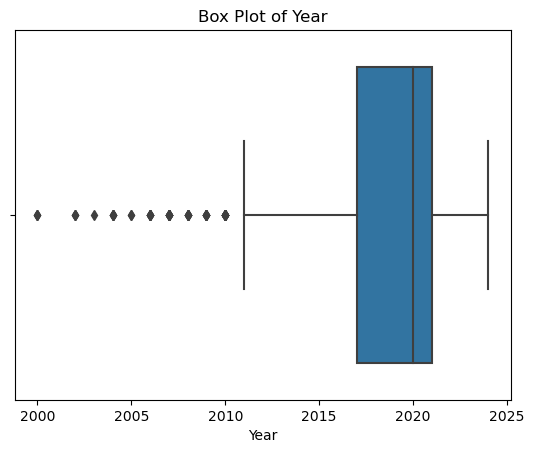

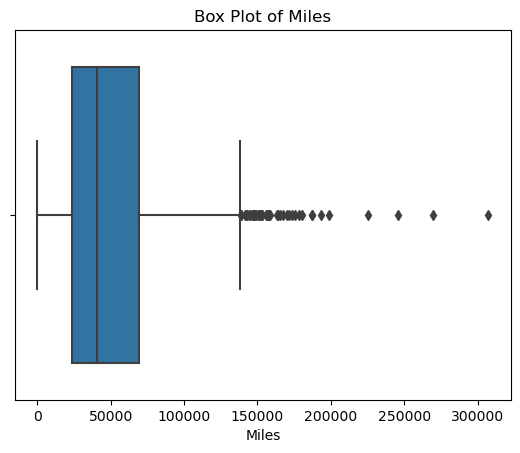

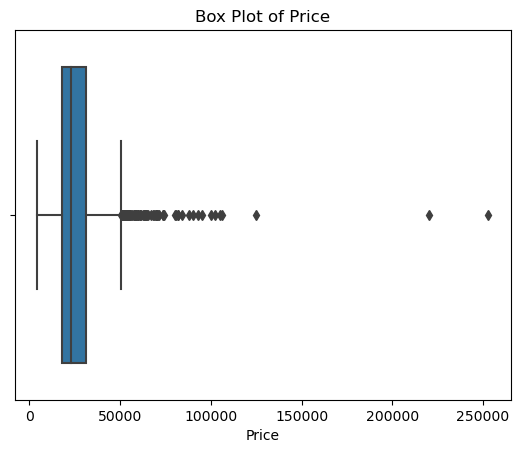

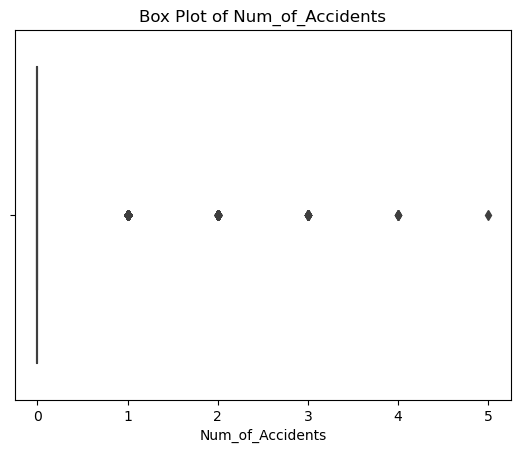

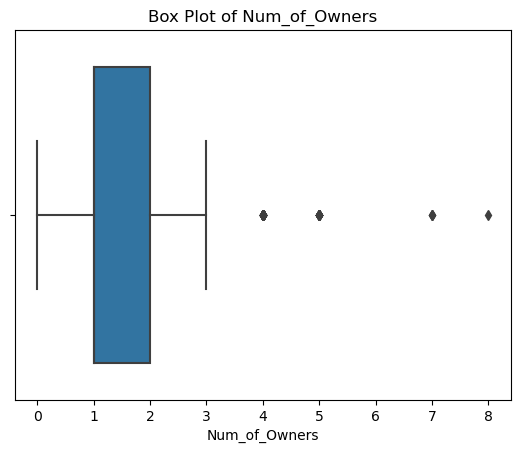

In [204]:
# Box plots for numerical variables

for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

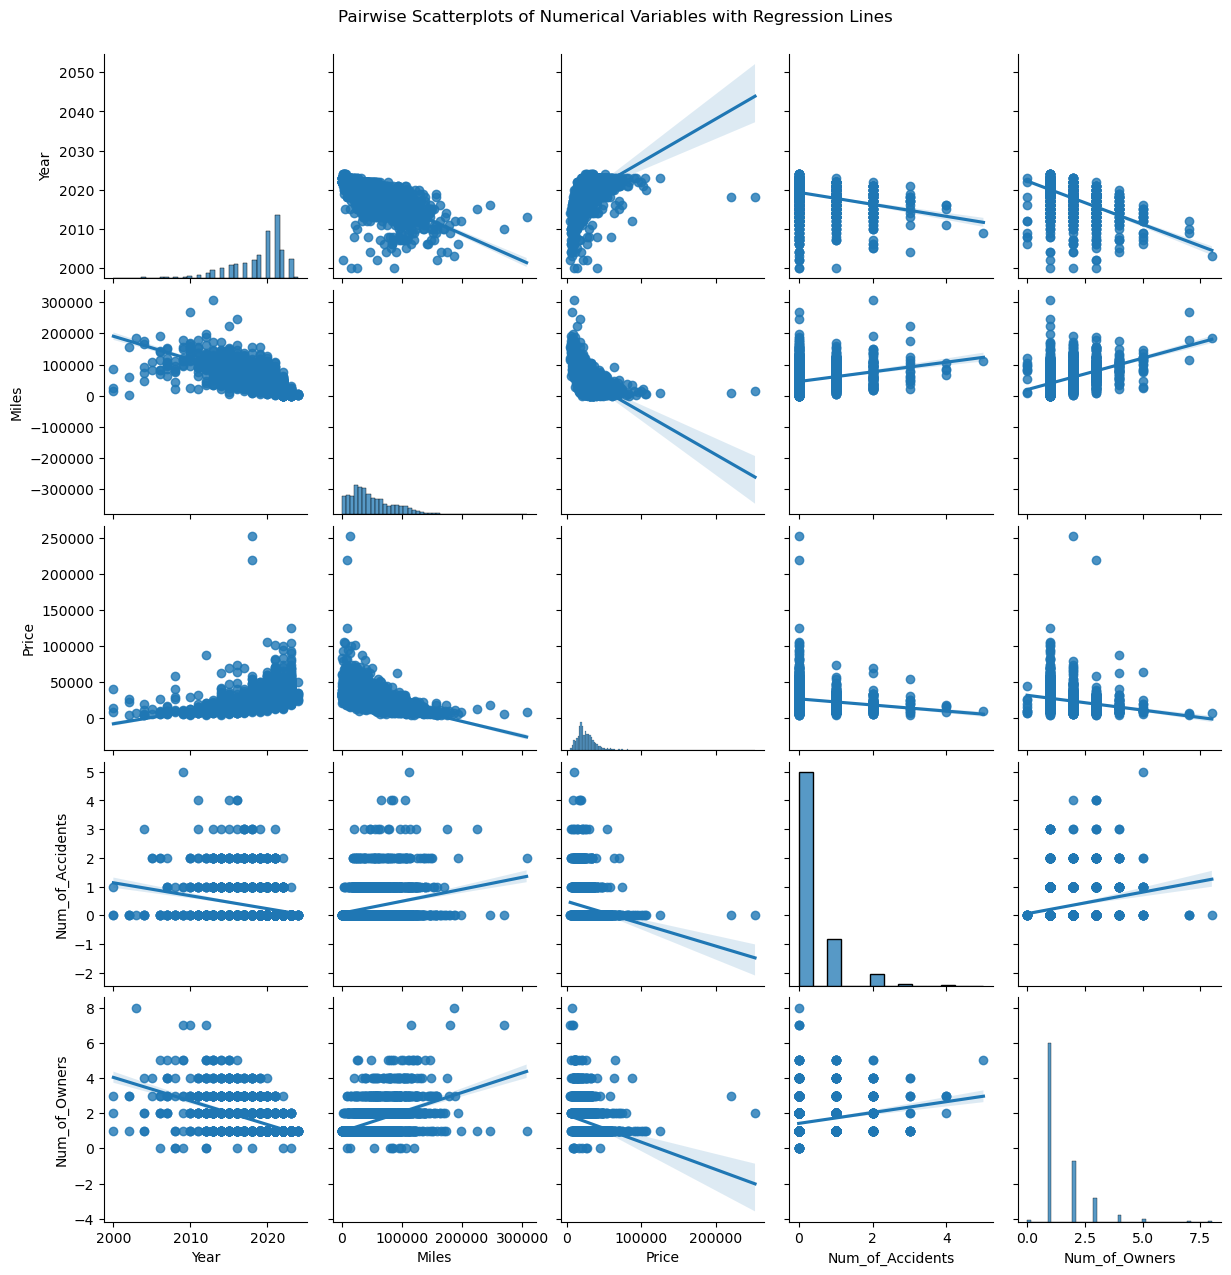

In [206]:
# Scatterplots for relationships between numerical variables

sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle('Pairwise Scatterplots of Numerical Variables with Regression Lines', y=1.02)
plt.show()

# Handling Outliers

In [216]:
# Define bounds for capping 'Miles' outliers

Q1_mile= df['Miles'].quantile(0.25)
Q3_mile= df['Miles'].quantile(0.75)
IQR_mile= Q3_mile - Q1_mile
lower_bound_mile= Q1_mile - 1.5*IQR_mile
upper_bound_mile= Q3_mile + 1.5*IQR_mile

df['Miles']= df['Miles'].clip(lower=lower_bound_mile, upper=upper_bound_mile)

In [217]:
# For 'Price' outliers

Q1_price= df['Price'].quantile(0.25)
Q3_price= df['Price'].quantile(0.75)
IQR_price= Q3_price - Q1_price
lower_bound_price= Q1_price - 1.5*IQR_price
upper_bound_price= Q3_price + 1.5*IQR_price

# Identify indices for Price outlier
outlier_indices_price= df[(df['Price'] < lower_bound_price) | (df['Price'] > upper_bound_price)].index

# Remove 'Price' outlier
df_1=df.drop(index=outlier_indices_price)

In [218]:
# Check Changes:

summary_changes= {'Rows After Price Outlier Removal': df_1.shape[0]}

summary_changes, df_1[['Miles', 'Price']].describe()

({'Rows After Price Outlier Removal': 2209},
                Miles         Price
 count    2209.000000   2209.000000
 mean    50735.638411  23957.056587
 std     34213.237396   9213.770563
 min        25.000000   4395.000000
 25%     25109.000000  17777.000000
 50%     41707.000000  22799.000000
 75%     71041.000000  29998.000000
 max    138015.250000  47999.000000)

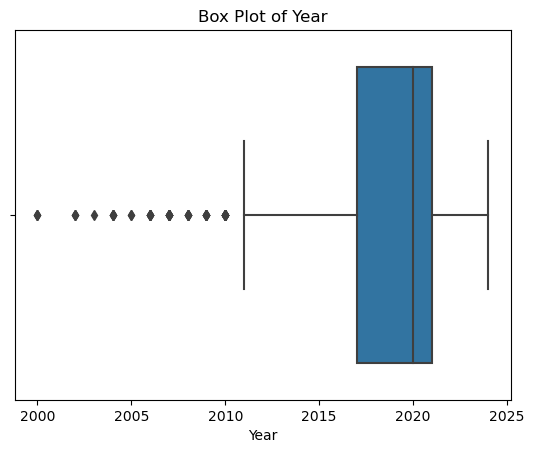

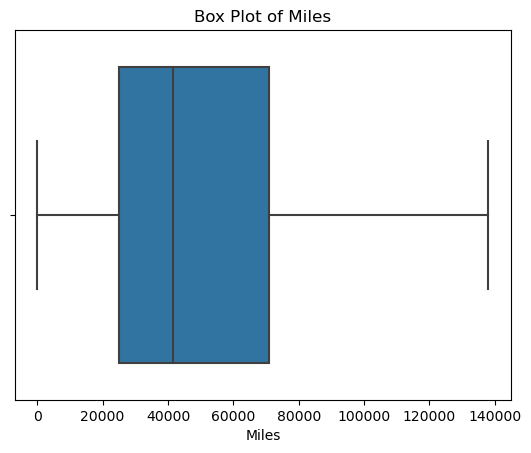

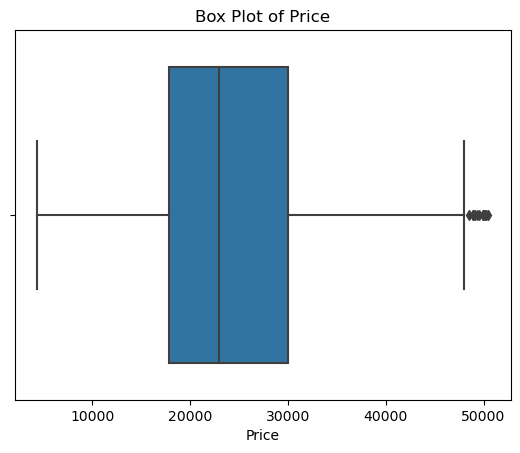

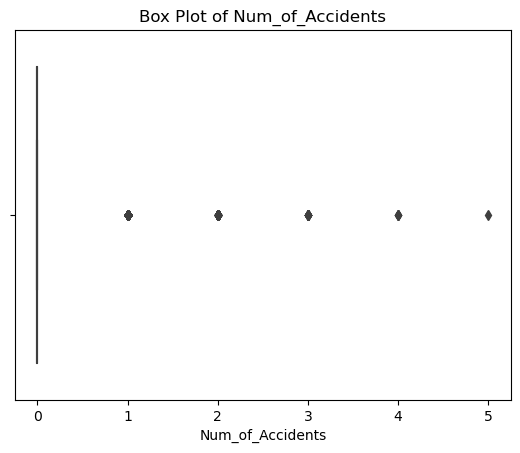

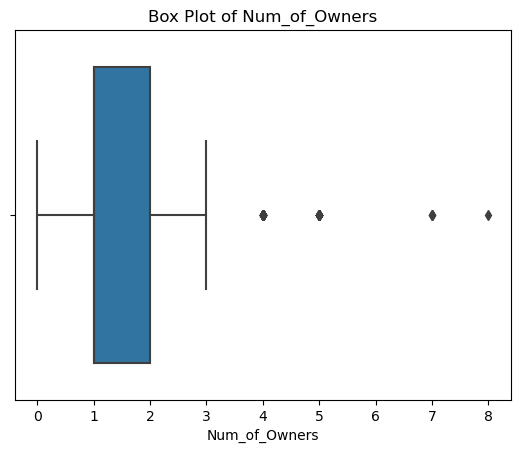

In [219]:
# Let's check the box plot after outlier removal

for col in df_1.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()